## Warpper feature selection



## ptimal number of features : 15

## ACC Best features : 91%

### (['Age', 'Adress', 'FBS', 'ALB', 'TCa', 'GPT', 'ALP', 'CEA', 'WBC', 'RBC','PLT', 'ESR', 'LDH', 'Na', 'K'],

## Recursive feature elimination with cross validation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import warnings

In [2]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

Feature - Cat, Target - Cat ==> Chi-Square

Feature - Numeric, Target - Numeric ==> Correlation

Feature - Cat, Target - Numeric ==> f_regression

Feature - Numeric, Target - Cat ==> f_classification


## Befoure missing values

In [3]:
BC = pd.read_csv('bc_with_mis_90.csv')
BC.shape

(2437, 23)

In [4]:
## دتاة لأيجاد الدقة

In [5]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
   # print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                      # pd.Series(y['CLASS'],name='Actual')))
    return 1

In [6]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 23 columns):
Sex          2437 non-null int64
Age          2437 non-null int64
Adress       2437 non-null object
FBS          2048 non-null float64
Urea         2275 non-null float64
Creatinin    2282 non-null float64
ALB          2148 non-null float64
TCa          2142 non-null float64
GPT          2140 non-null float64
GOT          2202 non-null float64
ALP          2126 non-null float64
CA15         2435 non-null float64
CEA          2435 non-null float64
WBC          2333 non-null float64
RBC          2369 non-null float64
HGB          2337 non-null float64
PLT          2258 non-null float64
ESR          2049 non-null float64
LDH          2052 non-null float64
Na           2011 non-null float64
K            2039 non-null float64
CL           1775 non-null float64
CLASS        2437 non-null int64
dtypes: float64(19), int64(3), object(1)
memory usage: 438.0+ KB


In [7]:
BC.CLASS.value_counts()

0    1351
1    1086
Name: CLASS, dtype: int64

In [8]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0


## After missing values

In [9]:
BC.isnull().sum()

Sex            0
Age            0
Adress         0
FBS          389
Urea         162
Creatinin    155
ALB          289
TCa          295
GPT          297
GOT          235
ALP          311
CA15           2
CEA            2
WBC          104
RBC           68
HGB          100
PLT          179
ESR          388
LDH          385
Na           426
K            398
CL           662
CLASS          0
dtype: int64

In [10]:
BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)

BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


## outlires by Z-score


In [11]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())

In [12]:

#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan


BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [13]:
BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)

BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [15]:
X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"]  

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

In [16]:
 from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 


In [17]:

rfecv = RFECV(estimator=D_classifier, step=1, cv=10, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

In [18]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['Age', 'Adress', 'FBS', 'ALB', 'TCa', 'GPT', 'ALP', 'CEA', 'WBC', 'RBC',
       'PLT', 'ESR', 'LDH', 'Na', 'K'],
      dtype='object')


In [19]:
rfecv.grid_scores_

array([0.7071909 , 0.74111872, 0.80736504, 0.84239777, 0.84131388,
       0.84949859, 0.86645349, 0.86697892, 0.85770132, 0.86427971,
       0.86481415, 0.86973218, 0.87738546, 0.87904582, 0.88833243,
       0.8790278 , 0.88013571, 0.87684802, 0.87848436, 0.87903981,
       0.87631658, 0.88232451])

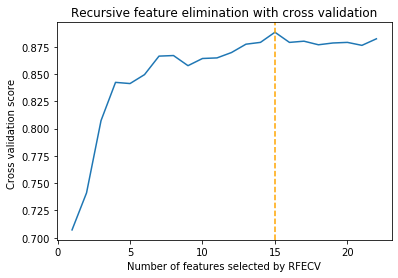

In [22]:
plt.figure()
plt.title('Recursive feature elimination with cross validation')
plt.xlabel("Number of features selected by RFECV")
plt.ylabel("Cross validation score ")

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.axvline(x=15, color='orange', linestyle='--')
plt.show()


In [21]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)
D_rfecv_model = D_classifier.fit(x_train_rfecv, y_train)
generate_accuracy_and_heatmap(D_rfecv_model, x_test_rfecv, y_test)

Accuracy is:  0.9147540983606557
F1 score is:  0.9051094890510949




1

In [23]:
y_pred = D_classifier.predict_proba(x_test_rfecv)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [24]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.9147540983606557

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,new_y,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,new_y,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.08524590163934426
mean_squared_error is = 0.2919690080117139


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.9147540983606557
[[310  31]
 [ 21 248]]


Text(33.0, 0.5, 'Acutl')

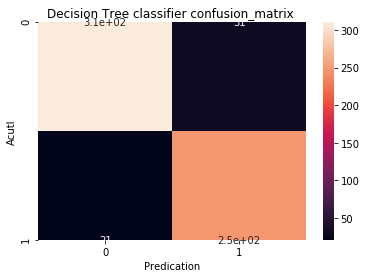

In [26]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train_rfecv,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [27]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test_rfecv)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       341
           1       0.89      0.92      0.91       269

    accuracy                           0.91       610
   macro avg       0.91      0.92      0.91       610
weighted avg       0.92      0.91      0.91       610

accuracy_score= 0.9147540983606557
